<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificador

## Motivação

A classificação é uma tarefa do aprendizado supervisionado na qual, dado um conjunto de dados rotulados, é criado um modelo que aprende a partir desses dados e se torna capaz de realizar predições para novos exemplos.

No Processamento de Linguagem Natural (NLP), a classificação desempenha um papel crucial. Ao lidar com grandes volumes de texto, a classificação permite organizar e categorizar informações de forma automática, facilitando a extração de insights para tomada de decisões. São exemplos de classificação em NLP, os problemas de classificação de emails como *spam* ou *não spam*, detecção do tema de um texto, detecçao do idioma do texto, dentre outros exemplos. Portanto, o estudo da classificação em NLP é fundamental para otimizar o tratamento e a análise de dados.

## Resultados Esperados

Neste laboratório, espera-se que o aluno compreenda a importância da classificação na área de NLP e aprenda a aplicá-la em um conjunto de dados, comparando os resultados de diferentes modelos de classificação. Essa comparação será feita
por meio das métricas tradicionais da classificação, como acurácia, precision, recall, entre outras. Dessa forma, o aluno também poderá reforçar o aprendizado desses conceitos.

## Fundamentação teórica

A classificação é uma subárea do aprendizado de máquina, inserida no campo do aprendizado supervisionado. O objetivo da classificação é treinar modelos para categorizar dados em diferentes classes predefinidas, permitindo que o modelo aprenda a associar entradas a suas respectivas categorias com base em exemplos rotulados.
A classificação pode ser utilizada nas áreas de saúde, marketings, finanças, tecnologia, entre outras, sendo bastante comum em NLP em problemas de análise de sentimento, reconhecimento de intenção, classificação de temas, entre outros.
Devido a grande importância da classificação, foram criados diversos algortimos ao longo do tempo para categorizar diferentes dados, tais como : K-Nearest Neighbors (KNN) , Árvores de Decisão, Random Forest, Naive Bayes, entre outros.

Neste laboratório, será estudado a classificação de uma base de dados de notícias. Dessa forma, serão realizadas as seguintes etapas:

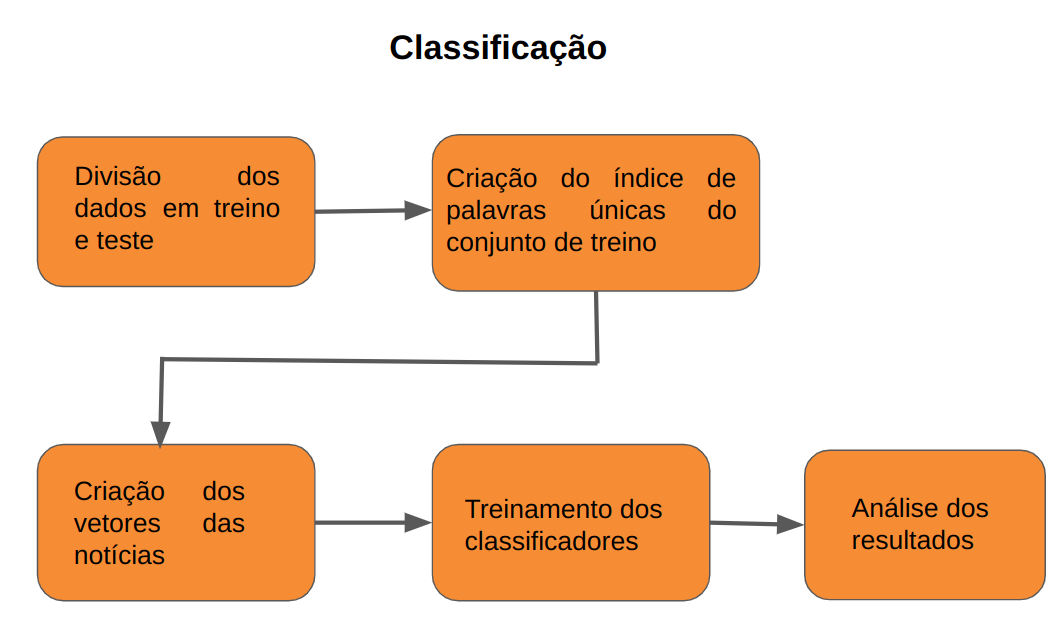

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/classifier/classifier.png" -O classifier.png
display(Image("classifier.png", width=500))



### Divisão dos dados em treino e teste

O conjunto de dados será dividido em dois subconjuntos, um para treino e outro para teste. Uma vez que serão utilizados classificadores da biblioteca *scikit-learn* e não será feito ajuste de parâmetros, optou-se por não criar um conjunto de validação. Assim, foi definido uma porcentagem de 20% para os dados de teste e 80% para os dados de treino. Vale ressaltar que essa porcentagem foi aplicada a cada classe do conjunto de notícias, garantindo que todos os rótulos estivessem presentes tanto no conjunto de treino quanto no conjunto de teste.


### Criação do índice de palavras únicas do treino

Esta etapa consiste em gerar um índice de palavras únicas a partir do conjunto de dados de treino. Esse índice será utilizado posteriormente para auxilixar a criação de vetores númericos das notícias de treino e teste.

### Criação dos vetores das notícias

Os modelos de classificação processsam apenas números. Dessa forma, é preciso tranformar cada arquivo em um vetor númerico, a fim de serem processados pelos algoritmos. Para tal, seram utitilizados três abordagens:

#### One-hot-enconding

Nessa abordagem, cada documento é transformado em um vetor binário, onde 1 indica a presença de uma palavra e 0 indica sua ausência. A análise de presença ou ausência de palavras é realizada com base no dicionário de palavras únicas (índice de palavras) criado a partir do conjunto de treino.  Assim, o vetor binário terá o mesmo tamanho do voculário, sendo que para cada palavra *i* do conjunto de treino, será inserido 0 ou 1 no vetor binário, indicando se essa palavra está presente no documento analisado ou não. Note que os vetores gerados serão esparsos.


#### Vetor de Frequência

Nessa abordagem, cada posição do vetor de frequência representa a frequência da palavra *i* do conjunto de treino em um documento *x*. Asssim, os vetores gerados terão o mesmo tamanho do vocabulário, isto é, o tamanho do dicionário de palavras únicas do treino.

#### Term Frequency – Inverse Document Frequency (TF-IDF)

O TF-IDF é uma técnica que cálcula a frequência de um termo, considerando o inverso de sua frequência dos documentos.  No método de calcular a frequência, considera-se que quanto mais um termo aparece em documento, maior a sua relevância. Apesar disso, existem termos que possuem alta frequência em todos os documentos, mas não acrescentam informção semântica. Dessa forma, o TF-IDF busca equilibrar esses conceitos.

A fórmula do TF-IDF é dada por:

$$ \text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$

Onde:
- **TF**(t, d) é a frequência do termo \( t \) no documento \( d \):

$$
\text{TF}(t, d) = \frac{\text{Número de ocorrências de } t \text{ em } d}{\text{Número total de palavras em } d}
$$

- **IDF**(t, D) é a frequência inversa do documento para o termo \( t \):

$$
\text{IDF}(t, D) = \log \frac{\text{Número total de documentos em } D}{1 + \text{Número de documentos contendo } t}
$$



### Treinamento dos classificadores

O treinamento dos classificadores será feito por meio dos métodos da biblioteca *scikit-learn*. Serão analisados os resultados dos seguintes classificadores:

* K Nearest Neighbors
* Linear SVM
* RBF SVM
* Gaussian Process
* Decision Tree
*  Random Forest
* Neural Net
* AdaBoost
* Naive Bayes


### Análise de resultados

Serão analisados a acurácia, precisão, recall, f1-score, macro avg, weighted avg e a matriz de confusão.

#### Acurácia
A acurácia é uma métrica bastante utilizada para avaliação de modelos de machine learning. Ela mede a quantidade de previsões corretas de um modelo em relação à quantidade total de previsões. Sua fórmula matemática é dada por :

$$ \text{Accuracy} = \frac{\text{VP} + \text{VN}}{\text{VP} + \text{VN} + \text{FP} + \text{FN}}  \quad \text{onde,} $$


\begin{align*}
\text{VP} &= \text{Verdadeiros Positivos} \\
\text{VN} &= \text{Verdadeiros Negativos} \\
\text{FP} &= \text{Falsos Positivos} \\
\text{FN} &= \text{Falsos Negativos}
\end{align*}

#### Precision


A precisão mede a quantidade de verdadeiros positivos em relação ao total de medições positivas. Sua fórmula é dada por :

$$
\text{Precisão} = \frac{\text{VP}}{\text{VP} + \text{FP}} \quad \text{onde,}
$$


\begin{align*}
\text{VP} &= \text{Verdadeiros Positivos} \\
\text{FP} &= \text{Falsos Positivos} \\
\end{align*}


#### Revocação (Recall)

O recall mede a quantidade de predições positivas verdadeiras em relação à quantidade total de predições positivas. O recall também é conhecido como sensibilidade. Basicamente mede a proporção de exemplos classificados corretamente como verdadeiros, sendo bastante útil em modelos onde é crucial avaliar corretamente. Sua fórmula é dada por :


$$
\text{Recall} = \frac{\text{VP}}{\text{VP} + \text{FN}} \quad \text{onde,}
$$



\begin{align*}
\text{VP} &= \text{Verdadeiros Positivos} \\
\text{FN} &= \text{Falsos Negativos}
\end{align*}


#### F1-score

O F1 score combina as métricas de precisão e recall em uma única métrica. Para isso,  o F1-scorre faz o cálculo da média harmônica entre precisão e recall. Sua fórmula é dada por:

$$
\text{F1-Score} = 2 \times \frac{\text{Precisão} \times \text{Recall}}{\text{Precisão} + \text{Recall}}
$$

#### Matriz de confusão

A matriz de confusão é uma ferramenta bastante utilizada para avaliar de forma concisa as métricas de acurácia, precisão e recall. Assim, a matriz de confusão é uma matriz quadrada em que o número de linhas/colunas é o mesmo que a quantidade de classes analisadas. Assim, as linhas da matriz indicam as classes reais e as colunas, as classes preditas. Veja abaixo um exemplo de uma Matriz de Confusão de duas classes.

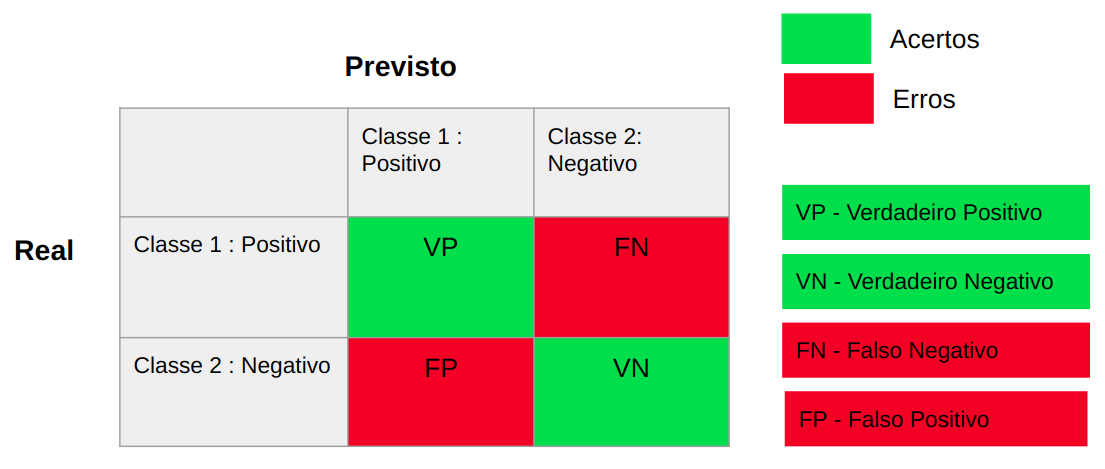

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/classifier/matriz2x2.png" -O matriz2x2.png
display(Image("matriz2x2.png", width=400))

Figura 1: Matriz de Confusão de duas classes

O dataset utilizado possui cinco classes. Portando, será analisado uma Matriz de Confusão 5x5, observe um exemplo abaixo:

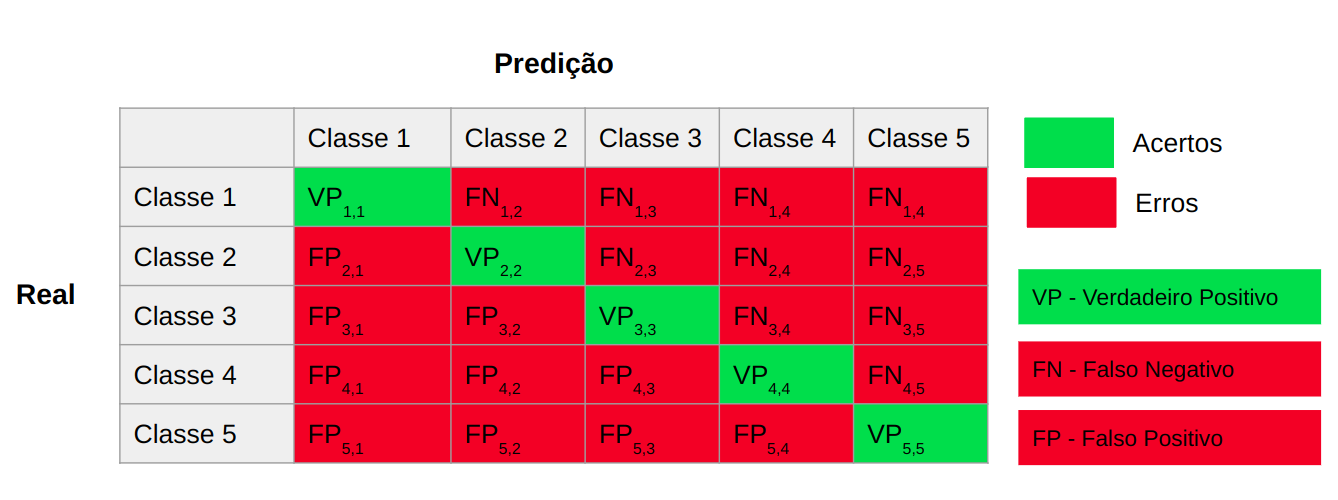

In [ ]:
from IPython.display import Image, display
!wget -q "https://raw.githubusercontent.com/elainedias16/TCC/main/assets/classifier/matriz5x5.png" -O matriz5x5.png
display(Image("matriz5x5.png", width=600))

Figura 2: Matriz de Confusão de cinco classes

Note que a diagonal da matriz de confusão são os exemplos classificados corretamente. As nomenclaturas de falso positivo ou falso negativo dependem da classe a ser analisada. Por exemplo, a célula $C_2,_1$ é um falso positivo considerando a Classe 1, porém, é um falso negativo considerando a Classe 2.

#### Média Macro (macro avg)

As métricas de precisão, recall e F1-score são calculadas para cada classe individualmente. A média macro, por sua vez, fornece uma visão geral do desempenho do modelo, calculando a média aritmética das métricas de precision, recall, F1-score, entre outras.


#### Média ponderado (weighted avg)

A média ponderada possui o intuito de calcular o desempenho geral do modelo assim como a média macro. A diferença é que na média ponderada, considera-se classes desbanceladas.  Dessa forma, caso uma classe possua uma proporção de amostras maior, esta classe terá um peso maior e consequentemente maior influência no resultado. A fórmula da média ponderada é dada por:

$$
\text{Weighted Average}(\text{metric}) = \frac{\sum_{i=1}^{n} (\text{weight}_i \cdot \text{metric}_i)}{\sum_{i=1}^{n} \text{weight}_i} \quad \text{onde,}
$$



* **Weighted Average(metric)** representa a média ponderada da métrica em questão.
* **n** é o número de classes
* **weight_i** é o peso associado à i-ésima classe.
* **metric_i** é o valor da métrica para a i-ésima classe.
* **∑ (weight_i ⋅ metric_i)** é a soma dos produtos dos pesos e dos valores da métrica para cada classe.
* **∑ weight_i** é a soma total dos pesos.

Assim como a média macro, pode-se calcular a média ponderada de qualquer métrica que analisa uma classe individualmente, como precision, recall e F1-score.


#### Support

O support indica a quantidade de vezes que cada classe aparece no conjunto de dados, ajudando a avaliar se o dataset está balanceado. Embora não seja uma métrica de desempenho, ele aparece no Classification Report do scikit-learn para fornecer contexto sobre a distribuição das classes, o que ajuda a interpretação das demais métricas, como precisão, recall e F1-score

## Código

### Leitura do Dataset

Download do dataset pré processado.

In [ ]:
!wget https://raw.githubusercontent.com/elainedias16/TCC/main/pre_processed_dataset.csv

--2024-09-08 18:18:38--  https://raw.githubusercontent.com/elainedias16/TCC/main/pre_processed_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84507 (83K) [text/plain]
Saving to: ‘pre_processed_dataset.csv.1’

pre_processed_datas 100%[===================>]  82.53K  --.-KB/s    in 0.02s   

2024-09-08 18:18:38 (3.43 MB/s) - ‘pre_processed_dataset.csv.1’ saved [84507/84507]



Leitura do dataset pré processado.

In [ ]:
import pandas as pd

with open('pre_processed_dataset.csv', 'r') as file:
    lines = file.readlines()


def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= ',',
    engine= 'python'
    )
    return df


df = create_dataframe('pre_processed_dataset.csv')

In [ ]:
df = df.drop(0, axis = 0)
df = df.reset_index(drop=True)
df

,genre,filename,title,content
0,business,288.txt,UK economy facing 'major risks',uk manufactur sector continu face seriou chall...
1,business,184.txt,US bank 'loses' customer details,bank america reveal lose comput tape contain a...
2,business,471.txt,China suspends 26 power projects,china order halt construct work 26 big power s...
3,business,35.txt,US gives foreign firms extra time,foreign firm give extra year meet tough new co...
4,business,377.txt,Ukraine strikes Turkmen gas deal,ukrain agr pay 30 natur ga suppli turkmenistan...
5,business,150.txt,Bank voted 8-1 for no rate change,deci keep interest rate hold 4 75 earli month ...
6,business,315.txt,Euronext 'poised to make LSE bid',pan european group euronext poi launch bid lon...
7,business,455.txt,Gazprom 'in $36m back-tax claim',nuclear unit russian energi giant gazprom repo...
8,business,206.txt,EMI shares hit by profit warning,share music giant emi sink 16 firm issu profit...
9,business,388.txt,Egypt to sell off state-owned bank,egyptian govern reportedli plan privati one co...


### Criação do dataframe para treino e para teste

O código abaixo faz a divisão do Dataframe para o conjunto de treino e teste. São separados 20% das notícias de cada classe para teste e as demais para treino. Não são separadas notícias para um conjunto de validação, pois não será feito ajuste de parâmetros.

In [ ]:
from sklearn.model_selection import train_test_split

def create_test_training_split(df, percent):
    X_train_list = []
    X_test_list = []
    y_train_list = []
    y_test_list = []
    grouped = df.groupby('genre')

    for genre, group_df in grouped:

          X = group_df.drop('genre', axis='columns')
          y = group_df['genre']
          X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=percent, random_state=42)

          X_train_list.append(X_train)
          X_test_list.append(X_test)
          y_train_list.append(y_train)
          y_test_list.append(y_test)


    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    return X_train, y_train, X_test, y_test






percent_test = 0.2
X_df_train, y_train, X_df_test, y_test = create_test_training_split(df, percent_test)

### Criação do dicionário das palavras do treino

O código abaixo cria um índice das palavras únicas do treino. Esse índice será utilizado para auxiliar a criação de vetores numéricos que representem as palavras. O tamanho de dicionário será a quantidade de palavras únicas do treino.

In [ ]:
def create_unique_words(content):
  words = content.split()

  # dict_words é um dicionário que mapeia uma palavra em um índice
  # agua -> 0
  # casa -> 1
  # bola -> 2
  # ...
  dict_words = {}

  for word in words:
    if word not in dict_words:
      dict_words[word] = len(dict_words)

  return dict_words


content_train = X_df_train['content'].str.cat(sep=' ')
unique_words_set_train = create_unique_words(content_train)

In [ ]:
print(unique_words_set_train)
print(f"Len unique_words: {len(unique_words_set_train)}")

{'shop': 0, 'uk': 1, 'report': 2, 'strong': 3, 'sale': 4, 'last': 5, 'saturday': 6, 'christma': 7, 'claim': 8, 'record': 9, 'break': 10, 'number': 11, 'festiv': 12, 'shopper': 13, 'spokesman': 14, 'manchest': 15, 'trafford': 16, 'centr': 17, 'say': 18, 'big': 19, 'date': 20, '5': 21, 'regent': 22, 'street': 23, 'associ': 24, 'central': 25, 'london': 26, 'also': 27, 'expect': 28, 'good': 29, 'ever': 30, 'pictur': 31, 'come': 32, 'despit': 33, 'disappoint': 34, 'coupl': 35, 'week': 36, 'spokeswoman': 37, '8': 38, '500': 39, 'thousand': 40, 'vehicl': 41, 'arriv': 42, '1130': 43, 'gmt': 44, 'predict': 45, 'next': 46, 'continu': 47, 'trend': 48, 'add': 49, 'similar': 50, 'stori': 51, 'bluewat': 52, 'kent': 53, 'alan': 54, 'jone': 55, '150': 56, '000': 57, 'visit': 58, 'end': 59, '100': 60, 'sunday': 61, 'far': 62, '2': 63, 'time': 64, 'year': 65, 'busi': 66, 'realli': 67, 'peopl': 68, 'right': 69, 'period': 70, 'spend': 71, 'excess': 72, '200': 73, 'afternoon': 74, 'st': 75, 'david': 76, 'c

### Transformando cada notícia em um vetor

#### Vetor one-hot

O código abaixo cria um vetor binário para uma notícia. Dessa forma, é passado o conteúdo da notícia e o vetor de palavras únicas do treino como parâmetro. O tamanho do vetor binário será o mesmo o que o tamanho de palavras únicas, sendo inicialmente preenchido com 0. Assim, para cada palavra do conjunto de treino presente no content da notícia, insere-se o número 1 na posição respectiva da palavra no vetor binário.


Vale ressaltar que essa função será utilizada tanto para a representaçao binária do conjunto de treino quanto para o cojunto de teste.

In [ ]:
import numpy as np

def create_binary_array_doc_aux(content, unique_words):
    tokens = content.split()
    binary_array = np.zeros((len(unique_words), ))
    for word in tokens:
        if word in unique_words:  # O(1)
            idx =  unique_words[word]
            binary_array[idx] = 1

    return binary_array

O método abaixo cria o vetor binário para todas as notícas de um DataFrame. Assim, percorre-se o DataFrame, capturando o conteúdo da notícia é o método auxiliar **create_binary_array_doc_aux** é chamado para cada notícia.

In [ ]:
def create_binary_array_docs(df, unique_words):
    binary_words = []
    for index, row in df.iterrows():
        content = row['content']
        binary_array = create_binary_array_doc_aux(content, unique_words)
        binary_words.append(binary_array)

    return binary_words



#Each line represents a docs and its columns represents if there is the respective unique_word in the docs
binary_words_docs = create_binary_array_docs(X_df_train, unique_words_set_train)

### Frequency of word in docs

O código abaixo cria um vetor de frequência para uma notícia do DataFrame. Assim, são passados como parâmetro o conteúdo da notícia e o vetor de palavras únicas do treino.  O tamannho do vetor de frequência será o mesmo do vetor de palavras únicas.

In [ ]:
def create_word_frequency_aux(content, unique_words):
    tokens = content.split()

    # cria um array de zeros do tamanho do dicionario de palavras diferentes
    tamanho = (len(unique_words), ) # tupla com um elemento
    word_frequency = np.zeros(tamanho)

    for word in tokens: # para cada palavra no texto
        if word in unique_words:  # se a palavra existe no dicionario de palavras unicas
            idx =  unique_words[word] # recupera o indice da palavra
            word_frequency[idx] += 1 # incrementa a frequencia (vimos a palavra mais uma vez)

    return word_frequency

O código abaixo cria um vetor de frequência para todas as notícias de um DataFrame. Para isso, esse método percorre o DataFrame, capturando o conteúdo da notícia e chamando o método auxiliar  **create_word_frequency_aux** .

In [ ]:
def create_word_frequency(df, unique_words):
  word_frequency = []
  for index, row in df.iterrows():
      content = row['content']
      word_frequency.append(create_word_frequency_aux(content, unique_words))

  return word_frequency

word_docs_frequency = create_word_frequency(X_df_train, unique_words_set_train)

### TF-IDF

O código abaixo calcula o TF-IDF para as notícias do DataFrame. Uma vez que já foi calculado a frequência de cada palavra nos documentos, basta calcula o idf e fazer a multiplicação entre os valores.

In [ ]:
def calcule_tfidf(frequency_matrix):
  total_docs = len(frequency_matrix)
  document_frequency = np.count_nonzero(frequency_matrix, axis=0)
  idf = np.log(total_docs / (1 + document_frequency))
  tfidf = frequency_matrix * idf
  return tfidf


tfidf = calcule_tfidf(word_docs_frequency)

### Treinando os classificadores


O código abaixo chama o método **label_encoder**, o qual tranforma cada rótulo do DataFrame, isto é , "business", "sports", "politics", "tech" e "entertainment" em um número de 0 a 4.

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

print("labels train", y_train)
print("labels test", y_test)

# decoded_labels = label_encoder.inverse_transform(y_train)
# print("Rótulos Decodificados:", decoded_labels)

labels train [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4
 4 4 4 4 4 4 4]
labels test [0 0 0 1 1 1 2 2 2 2 3 3 3 4 4]


O código abaixo chama os métodos que transformam cada notícia em vetor numérico. Desse modo, o conjunto de treino e de teste terão três representações: Representação Binária, Representação de Frequência e TF-IDF. Essas representações são agrupadas nos vetores X_train e X_test.

In [ ]:
X_binary_train  = create_binary_array_docs(X_df_train, unique_words_set_train)
X_frequency_train = create_word_frequency(X_df_train, unique_words_set_train)
X_tfidf_train = calcule_tfidf(X_frequency_train)

X_train = [X_binary_train, X_frequency_train, X_tfidf_train ]

X_binary_test = create_binary_array_docs(X_df_test, unique_words_set_train)
X_frequency_test = create_word_frequency(X_df_test, unique_words_set_train)
X_tfidf_test = calcule_tfidf(X_frequency_test)

X_test = [X_binary_test , X_frequency_test , X_tfidf_test ]

Imports dos classificadores

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

O código abaixo captura os gêneros únicos do DataFrame e organiza os nomes dos classificadores em um array. Também é feito um array para mostrar os nomes da codificação numérica das notícias, isto é , em dados binários, por frequência e TF-IDF. O código abaixo visa facilitar o entendimento do resultado da classificação.

In [ ]:
genres = df['genre'].unique()

name_vector = ['Binary', 'Frequency', 'TF-IDF']

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
]

O código abaixa cria as instâncias dod modelos de clasificadores que serão utilizados.

In [ ]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
]

O código abaixo faz a classificação para o conjunto de treino e conjunto de teste. São utilizados os seguintes classificadores:
KNN, Linear SVM, RBF SVM, Gaussian Process, Decision Tree, Random Forest, Neural Net, AdaBoost, Naive Bayes. Dessa forma, para cada conjunto de treino e teste, é feito o treinamento e predições para cada classificador. Também é calculado a acurácia e é chamado o método de **classification_repor**t para treino e para teste bem como a Matriz de Confusão.

Vale ressaltar que há três representação para as notícias do conjunto de treino e três representação para as notícias do cojunto de teste: Vetor Binário, Vetor de Frequência e Vetor TF-IDF. Por causa disso, são três conjuntos de treino e testes, armazenados em X_train e X_test, respectivamente.

In [ ]:
for idx, ((X_train_idx, X_test_idx), name) in enumerate(zip(zip(X_train, X_test), name_vector)):


  print(f'*************** Data {name} ****************************')

  for name, clf in zip(names, classifiers):

      clf.fit(X_train_idx, y_train)

      y_test_pred = clf.predict(X_test_idx)
      y_train_pred = clf.predict(X_train_idx)

      acc = accuracy_score(y_test, y_test_pred)
      print("-------------------- {} ----------------------".format(name))
      test_report = classification_report(y_test, y_test_pred, target_names=genres, zero_division=0)
      train_report = classification_report(y_train, y_train_pred, target_names=genres, zero_division=0)
      print('Train report')
      print(train_report)
      print('Test report')
      print(test_report)

      print("{}: Accuracy: {:.4%}".format(name, acc))
      conf_max = confusion_matrix(y_test, y_test_pred)
      print(f"Confusion Matrix:\n{conf_max}")



  print("="*30)

*************** Data Binary ****************************
-------------------- Nearest Neighbors ----------------------
Train report
               precision    recall  f1-score   support

     business       0.60      0.75      0.67         8
entertainment       0.36      0.62      0.45         8
     politics       0.67      1.00      0.80        12
        sport       1.00      0.25      0.40         8
         tech       0.00      0.00      0.00         8

     accuracy                           0.57        44
    macro avg       0.52      0.53      0.46        44
 weighted avg       0.54      0.57      0.49        44

Test report
               precision    recall  f1-score   support

     business       0.60      1.00      0.75         3
entertainment       0.50      0.33      0.40         3
     politics       0.50      1.00      0.67         4
        sport       0.00      0.00      0.00         3
         tech       0.00      0.00      0.00         2

     accuracy             

## Referências

@online{stackexchange_macro_average,
  author    = {User},
  title     = {Macro average and weighted average meaning in classification report},
  year      = {2019},
  url       = { https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report },
  note      = {Acessado em: 8 de setembro de 2024}
}

@online{filho_precisao_recall_f1,
  author    = {Mário Filho},
  title     = {Precisão, Recall e F1-Score em Machine Learning},
  year      = {2020},
  url       = { https://mariofilho.com/precisao-recall-e-f1-score-em-machine-learning/ },
  note      = {Acessado em: 8 de setembro de 2024}
}


@online{semantix_tfidf,
  author    = {Semantix},
  title     = {TF-IDF: Entenda o que é Frequency Inverse Document Frequency},
  year      = {2021},
  url       = { https://semantix.ai/tf-idf-entenda-o-que-e-frequency-inverse-document-frequency/ },
  note      = {Acessado em: 8 de setembro de 2024}
}

